In [1]:
! pip install pandas


In [2]:
import pandas as pd

In [3]:


data_train = pd.read_csv("train.tsv", sep="\t", header=None)
data_valid = pd.read_csv("valid.tsv", sep="\t", header=None)    
data_test = pd.read_csv("test.tsv", sep="\t", header=None)

In [4]:
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
data_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [6]:
data_valid.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [7]:
def data_preprocessing(dataset):
    # Creating new 'label' column based on column 1
    dataset['label'] = [1 if x in ["true", "mostly-true"] else 0 for x in dataset[1]]
    
    # Debug: print current columns
    print("Columns before dropping:", dataset.columns.tolist())
    
    # Drop unwanted columns by label (not by position)
    dataset = dataset.drop(columns=[0, 1, 8, 9, 10, 11, 12])
    
    # Process metadata columns
    meta = []
    for i in range(len(dataset)):
        subject = dataset.loc[i, 3] if dataset.loc[i, 3] != 0 else 'None'
        speaker = dataset.loc[i, 4] if dataset.loc[i, 4] != 0 else 'None'
        job = dataset.loc[i, 5] if dataset.loc[i, 5] != 0 else 'None'
        state = dataset.loc[i, 6] if dataset.loc[i, 6] != 0 else 'None'
        affiliation = dataset.loc[i, 7] if dataset.loc[i, 7] != 0 else 'None'
        context = dataset.loc[i, 13] if dataset.loc[i, 13] != 0 else 'None'
        meta.append(f"{subject} {speaker} {job} {state} {affiliation} {context}")
    
    # Add the combined metadata column
    dataset['combined_meta'] = meta
    # Create 'sentence' by combining metadata with text from column 2
    dataset["sentence"] = dataset['combined_meta'].astype(str) + " " + dataset[2].astype(str)
    
    # Now drop the original metadata columns and the temporary 'combined_meta'
    dataset = dataset.drop(columns=[2, 3, 4, 5, 6, 7, 13, 'combined_meta'])
    
    # Drop any remaining rows with null values
    dataset = dataset.dropna()
    
    return dataset

In [8]:
data_train = data_preprocessing(data_train)
data_valid = data_preprocessing(data_valid)
data_test = data_preprocessing(data_test)


Columns before dropping: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 'label']
Columns before dropping: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 'label']
Columns before dropping: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 'label']


In [9]:
data_train

,label,sentence
0,0,abortion dwayne-bohac State representative Tex...
1,0,"energy,history,job-accomplishments scott-surov..."
2,1,foreign-policy barack-obama President Illinois...
3,0,health-care blog-posting nan nan none a news r...
4,0,"economy,jobs charlie-crist nan Florida democra..."
...,...,...
10235,1,"animals,elections aclu-florida nan Florida non..."
10236,1,elections alan-powell nan Georgia republican a...
10237,0,"retirement,social-security herman-cain nan Geo..."
10238,0,"florida,foreign-policy jeff-greene nan Florida..."


In [10]:
data_valid

,label,sentence
0,0,"economy,jobs vicky-hartzler U.S. Representativ..."
1,0,"obama-birth-certificate,religion chain-email n..."
2,0,"campaign-finance,congress,taxes earl-blumenaue..."
3,0,poverty jim-francesconi Member of the State Bo...
4,0,"economy,stimulus barack-obama President Illino..."
...,...,...
1279,0,"energy,oil-spill,trade barack-obama President ..."
1280,1,candidates-biography hillary-clinton President...
1281,1,health-care campaign-defend-america nan Washin...
1282,0,health-care americans-united-change nan nan no...


In [11]:
data_test

,label,sentence
0,1,immigration rick-perry Governor Texas republic...
1,0,jobs katrina-shankland State representative Wi...
2,0,"military,veterans,voting-record donald-trump P..."
3,0,"medicare,message-machine-2012,campaign-adverti..."
4,0,"campaign-finance,legal-issues,campaign-adverti..."
...,...,...
1262,0,education rick-scott Governor Florida republic...
1263,0,"civil-rights,crime,criminal-justice jay-nixon ..."
1264,0,"bipartisanship,congress,foreign-policy,history..."
1265,0,"environment,government-efficiency john-kasich ..."


In [12]:
data_train.head(5)

,label,sentence
0,0,abortion dwayne-bohac State representative Tex...
1,0,"energy,history,job-accomplishments scott-surov..."
2,1,foreign-policy barack-obama President Illinois...
3,0,health-care blog-posting nan nan none a news r...
4,0,"economy,jobs charlie-crist nan Florida democra..."


In [13]:
data_train["label"].value_counts()

label
0    6602
1    3638
Name: count, dtype: int64

In [14]:
data_valid["label"].value_counts()

label
0    864
1    420
Name: count, dtype: int64

In [15]:
data_test['label'].value_counts()


label
0    818
1    449
Name: count, dtype: int64

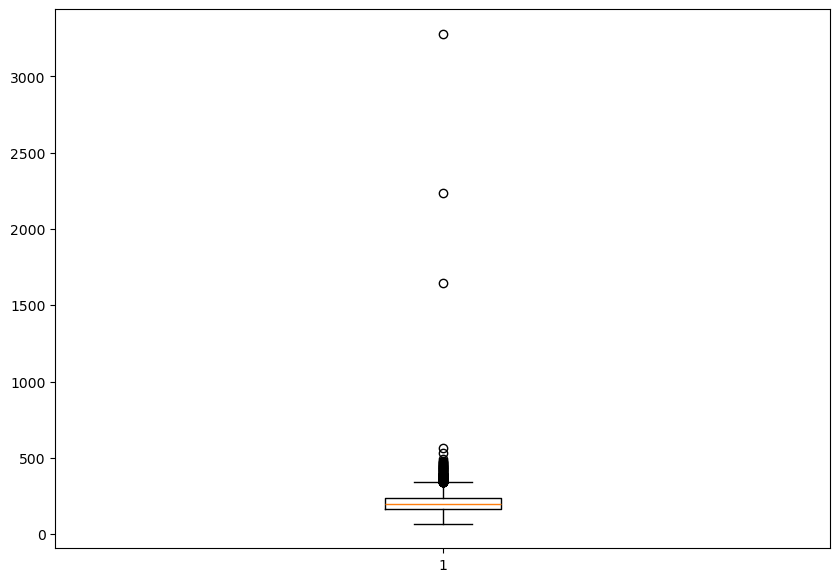

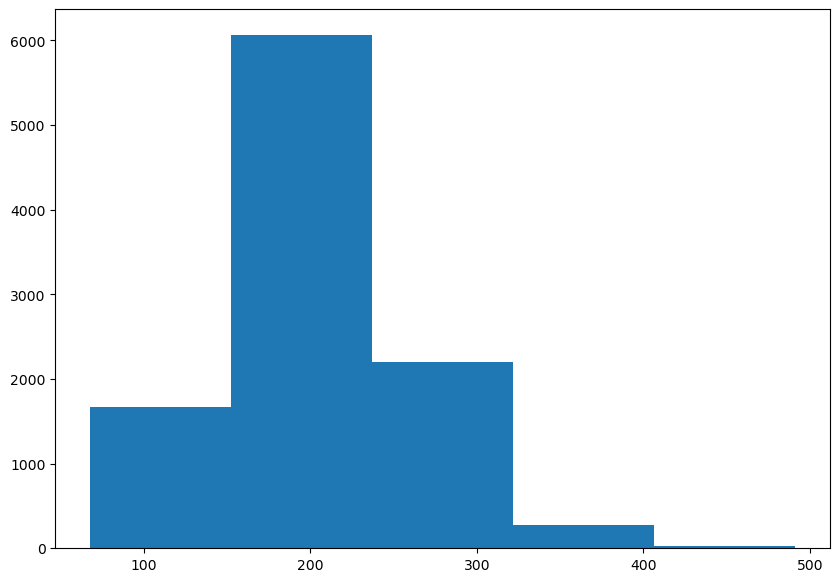

In [16]:
sent_len = [] 
for sent in data_train["sentence"]:
    sent_len.append(len(sent))

import matplotlib.pyplot as plt 

fig = plt.figure(figsize =(10, 7))
plt.boxplot(sent_len)
plt.show()

sent_len = [i for i in sent_len if i<=500] #Excluding the outliers
fig2 = plt.figure(figsize =(10, 7))
plt.hist(sent_len, 5)
plt.show()

In [17]:
! pip install transformers 

In [18]:
! pip install --upgrade torch torchvision

In [19]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
from transformers import RobertaForSequenceClassification
from transformers import RobertaTokenizer

In [20]:
! pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [21]:
import os
import torch

In [22]:
output_dir = './model_save/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [23]:

import torch
print(torch.cuda.is_available())   # Should be False on Mac
print(torch.backends.mps.is_available())  # True if using an M1/M2 Mac with proper PyTorch support

False
True


In [24]:
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", #Using BERT base model with an uncased vocab.
                                                                num_labels = 2, #number of output labels - 0,1 (binary classification)
                                                                output_attentions = False, #model doesnt return attention weights
                                                                output_hidden_states = False #model doesnt return hidden states
                                                          )

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)


bert_model = bert_model.to("mps")

roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", #RoBERTa base model
                                                                    num_labels = 2,  #number of output labels - 0,1 (binary classification)
                                                                    output_attentions = False,  #model doesnt return attention weights
                                                                    output_hidden_states = False #model doesnt return hidden states
                                                                )

roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base", do_lower_case=True)

bert_model = bert_model.to("mps")
print("base models loaded ")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


base models loaded 


In [25]:
if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
    
bert_model = bert_model.to(device)
device

'mps'

In [26]:
print(' Original: ', data_train["sentence"][0])

# Split the sentence into tokens - BERT
print('Tokenized BERT: ', bert_tokenizer.tokenize(data_train["sentence"][0]))

# Mapping tokens to token IDs - BERT
print('Token IDs BERT: ', bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(data_train["sentence"][0])))

# Split the sentence into tokens -RoBERTa
print('Tokenized RoBERT: ', roberta_tokenizer.tokenize(data_train["sentence"][0]))

# Mapping tokens to token IDs - RoBERTa
print('Token IDs RoBERTa: ', roberta_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(data_train["sentence"][0])))

 Original:  abortion dwayne-bohac State representative Texas republican a mailer Says the Annies List political group supports third-trimester abortions on demand.
Tokenized BERT:  ['abortion', 'd', '##way', '##ne', '-', 'bo', '##ha', '##c', 'state', 'representative', 'texas', 'republican', 'a', 'mail', '##er', 'says', 'the', 'annie', '##s', 'list', 'political', 'group', 'supports', 'third', '-', 'trim', '##ester', 'abortion', '##s', 'on', 'demand', '.']
Token IDs BERT:  [11324, 1040, 4576, 2638, 1011, 8945, 3270, 2278, 2110, 4387, 3146, 3951, 1037, 5653, 2121, 2758, 1996, 8194, 2015, 2862, 2576, 2177, 6753, 2353, 1011, 12241, 20367, 11324, 2015, 2006, 5157, 1012]
Tokenized RoBERT:  ['abortion', 'Ġd', 'wayne', '-', 'b', 'oh', 'ac', 'ĠState', 'Ġrepresentative', 'ĠTexas', 'Ġrepublican', 'Ġa', 'Ġmail', 'er', 'ĠSays', 'Ġthe', 'ĠAnn', 'ies', 'ĠList', 'Ġpolitical', 'Ġgroup', 'Ġsupports', 'Ġthird', '-', 'tr', 'imester', 'Ġabortions', 'Ġon', 'Ġdemand', '.']
Token IDs RoBERTa:  [27275, 385, 201

In [27]:
sentences = data_train["sentence"].values 
labels = data_train["label"].values

In [28]:
import torch

In [29]:
# Below function performs tokenization process as required by bert and roberta models, for a given dataset
def bert_robert_tokenization(dataset):
  sentences = dataset["sentence"].values
  labels = dataset["label"].values
  max_length = 256

  # Tokenize all of the sentences and map the tokens to thier word IDs.
  bert_input_ids = []
  bert_attention_masks = []
  roberta_input_ids = []
  roberta_attention_masks = []

  sentence_ids = []
  counter = 0

  # For every sentence...
  for sent in sentences:
      #encode_plus function will encode the sentences as required by model, including tokenization process and mapping token ids
      bert_encoded_dict = bert_tokenizer.encode_plus(
                          str(sent),        #sentence              
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]' tokens 
                          max_length = 256,     #Since we have seen from our analysis that majority of sentences have length less than 300.    
                          pad_to_max_length = True,    # Pad sentences to 256 length  if the length of sentence is less than max_length
                          return_attention_mask = True,   # Create attention mask
                          truncation = True,  # truncate sentences to 256 length  if the length of sentence is greater than max_length
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
      roberta_encoded_dict = roberta_tokenizer.encode_plus(
                          str(sent),        #sentence
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]' tokens 
                          max_length = 256,        #Since we have seen from our analysis that majority of sentences have length less than 300.   
                          pad_to_max_length = True,     # Pad sentences to 256 length  if the length of sentence is less than max_length
                          return_attention_mask = True,   # Create attention mask
                          truncation = True,   # truncate sentences to 256 length  if the length of sentence is greater than max_length
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
    
      # Add the encoded sentence to the list.    
      bert_input_ids.append(bert_encoded_dict['input_ids'])
      roberta_input_ids.append(roberta_encoded_dict['input_ids'])
      
      
      # Add attention mask to the list 
      bert_attention_masks.append(bert_encoded_dict['attention_mask'])
      roberta_attention_masks.append(roberta_encoded_dict['attention_mask'])
      
      
      # collecting sentence_ids
      sentence_ids.append(counter)
      counter  = counter + 1
      
      
      
  # Convert the lists into tensors.
  bert_input_ids = torch.cat(bert_input_ids, dim=0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim=0)

  roberta_input_ids = torch.cat(roberta_input_ids, dim=0)
  roberta_attention_masks = torch.cat(roberta_attention_masks, dim=0)


  labels = torch.tensor(labels)
  sentence_ids = torch.tensor(sentence_ids)

  return {"Bert":[bert_input_ids, bert_attention_masks, labels], "Roberta":[roberta_input_ids, roberta_attention_masks, labels]}

In [30]:
from torch.utils.data import TensorDataset, random_split
# function to seed the script globally
torch.manual_seed(0)

#tokenizing train set
token_dict_train = bert_robert_tokenization(data_train)

bert_input_ids,bert_attention_masks,labels = token_dict_train["Bert"]
roberta_input_ids, roberta_attention_masks, labels = token_dict_train["Roberta"]

#tokenizing validation set
token_dict_valid = bert_robert_tokenization(data_valid)

bert_input_ids_valid,bert_attention_masks_valid,labels_valid = token_dict_valid["Bert"]
roberta_input_ids_valid, roberta_attention_masks_valid, labels_valid = token_dict_valid["Roberta"]

#tokenizing test set
token_dict_test = bert_robert_tokenization(data_test)

bert_input_ids_test,bert_attention_masks_test,labels_test = token_dict_test["Bert"]
roberta_input_ids_test, roberta_attention_masks_test, labels_test = token_dict_test["Roberta"]

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [31]:
#Combine the teaining , test , validation sapratly  inputs into a tENSORdATASET 
bert_train_dataset = TensorDataset(bert_input_ids, bert_attention_masks , labels)
roberta_train_dataset = TensorDataset(roberta_input_ids , roberta_attention_masks, labels )

bert_val_dataset = TensorDataset(bert_input_ids_valid,bert_attention_masks_valid,labels_valid)
roberta_val_dataset = TensorDataset(roberta_input_ids_valid, roberta_attention_masks_valid, labels_valid)

bert_test_dataset = TensorDataset(bert_input_ids_test,bert_attention_masks_test,labels_test)
roberta_test_dataset = TensorDataset(roberta_input_ids_test, roberta_attention_masks_test, labels_test)

In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

# Create the DataLoaders for our training - Loads the data randomly in batches of size 32
bert_train_dataloader = DataLoader(
            bert_train_dataset,  # The training samples.
            sampler = RandomSampler(bert_train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

roberta_train_dataloader = DataLoader(
            roberta_train_dataset,  # The training samples.
            sampler = RandomSampler(roberta_train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# Create the DataLoaders for our validation - Loads the data in batches of size 32
bert_validation_dataloader = DataLoader(
            bert_val_dataset, # The validation samples.
            sampler = SequentialSampler(bert_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )


roberta_validation_dataloader = DataLoader(
            roberta_val_dataset, # The validation samples.
            sampler = SequentialSampler(roberta_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [33]:
from torch.optim import AdamW
bert_optimizer = AdamW(bert_model.parameters(),
                      lr = 5e-5,
                      eps = 1e-8
)

roberta_optimizer = AdamW(roberta_model.parameters(),
                         lr = 5e-5,
                         eps = 1e-8
                         )

In [34]:
from transformers import get_linear_schedule_with_warmup 

epochs = 2 

total_steps = len(bert_train_dataloader)* epochs

bert_scheduler = get_linear_schedule_with_warmup(
    bert_optimizer , 
    num_warmup_steps = 0 ,
    num_training_steps= total_steps 
)
roberta_scheduler = get_linear_schedule_with_warmup(
    roberta_optimizer,
    num_warmup_steps= 0 ,
    num_training_steps = total_steps
)

In [35]:
import numpy as np 
#claculating the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np. argmax(preds,axis = 1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [36]:
import time 
import datetime 

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds = elapsed_rounded))

In [37]:
import torch 



if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Apple MPS backend is available. Using the Apple GPU for computations.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"There are {torch.cuda.device_count()} GPU(s) available.")
    print(f"We will use the GPU: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")

Apple MPS backend is available. Using the Apple GPU for computations.


In [38]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

epochs = 2 

loss_values = []

for epoch_i in range(0, epochs):
    #Training
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss for this epoch.
    total_loss = 0
    bert_model.train()
    # For each batch of training data...
    for step, batch in enumerate(bert_train_dataloader):
      #Report progress after every 40 epochs
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # print current training batch and elapsed time
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(bert_train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        bert_model.zero_grad()

        outputs = bert_model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # model returns a tuple, extract loss value from that tuple
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)
        bert_optimizer.step()

        bert_scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(bert_train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    #Validation Part
    checkpoint = {
        'epoch': epoch_i + 1,
        'model_state_dict': bert_model.state_dict(),
        'optimizer_state_dict': bert_optimizer.state_dict(),
        'scheduler_state_dict': bert_scheduler.state_dict(),
        'loss': avg_train_loss,
    }
    
    checkpoint_path = os.path.join(output_dir, f'checkpoint_epoch_{epoch_i + 1}.pt')
    torch.save(checkpoint, checkpoint_path)
    print(f"  Checkpoint saved to {checkpoint_path}")


    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode
    bert_model.eval()
    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in bert_validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
           outputs = bert_model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    320.    Elapsed: 0:01:16.
  Batch    80  of    320.    Elapsed: 0:02:31.
  Batch   120  of    320.    Elapsed: 0:03:45.
  Batch   160  of    320.    Elapsed: 0:04:58.
  Batch   200  of    320.    Elapsed: 0:06:11.
  Batch   240  of    320.    Elapsed: 0:07:29.
  Batch   280  of    320.    Elapsed: 0:08:40.

  Average training loss: 0.63
  Training epcoh took: 0:09:52
  Checkpoint saved to ./model_save/checkpoint_epoch_1.pt

Running Validation...
  Accuracy: 0.68
  Validation took: 0:00:21

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    320.    Elapsed: 0:01:13.
  Batch    80  of    320.    Elapsed: 0:02:25.
  Batch   120  of    320.    Elapsed: 0:03:37.
  Batch   160  of    320.    Elapsed: 0:04:48.
  Batch   200  of    320.    Elapsed: 0:06:00.
  Batch   240  of    320.    Elapsed: 0:07:16.
  Batch   280  of    320.    Elapsed: 0:08:29.

  Average training loss: 0.57
  Training epcoh took: 0:09:43
  Checkp

In [39]:
#plotting the training loss over epochs 
import plotly.express as px 
f = pd.DataFrame(loss_values)
f.columns = ['loss']
fig = px.line(f, x = f.index,y=f.loss)
fig.update_layout(title = 'Training Loss over Epochs',
                  xaxis_title = 'Epochs',
                  yaxis_title = 'Loss')
fig.show()




In [40]:
bert_predictions = SequentialSampler(bert_test_dataset)
bert_prediction_dataloader = DataLoader(bert_test_dataset, sampler = bert_predictions, batch_size = batch_size)

In [41]:
print(f"Predictig on {len(bert_input_ids_test)} test sentences")

bert_model.eval()

predictions , true_labels = [],[]


Predictig on 1267 test sentences


In [42]:
for bathc in bert_prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = bert_model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask)
            # Move logits and labels to CPU
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)
print("done")
    # Convert predictions and true labels to numpy arrays


done


In [43]:
predictions_labels = [item for subitem in predictions for item in subitem]
predictions_labels = np.argmax(predictions_labels , axis = 1).flatten()

#combine the correct labels for each bath into a signle list 
flat_true_labels = [item for subitem in true_labels for item in subitem]

from sklearn.metrics import classification_report , confusion_matrix 

print(classification_report(predictions_labels , flat_true_labels))
print(confusion_matrix(predictions_labels , flat_true_labels))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       120
           1       0.50      1.00      0.67        40

    accuracy                           0.75       160
   macro avg       0.75      0.83      0.73       160
weighted avg       0.88      0.75      0.77       160

[[80 40]
 [ 0 40]]


## training and validation 

In [44]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")
print(f"MPS built: {torch.backends.mps.is_built()}")

PyTorch version: 2.6.0
MPS available: True
MPS built: True


In [45]:
import random
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
loss_values = []

# Set device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS (Apple Silicon) device")
else:
    device = torch.device("cpu")
    print("Using CPU device")

# Initialize model
#roberta_model = RobertaForSequenceClassification.from_pretrained(
#    'roberta-base',
#    num_labels=2,
#    output_attentions=False,
#    output_hidden_states=False,
#)

roberta_model = RobertaForSequenceClassification.from_pretrained(
    'distilroberta-base',  # This is a distilled version of RoBERTa, much faster
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)

# Optimize batch size
batch_size = 16 

# Move model to device BEFORE creating optimizer
roberta_model = roberta_model.to(device)

# Initialize optimizer and scheduler AFTER model is on device
optimizer = AdamW(roberta_model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                          num_warmup_steps=0,
                                          num_training_steps=total_steps)

for epoch_i in range(0, epochs):
    print('')
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_loss = 0
    roberta_model.train()

    # Add gradient accumulation
    accumulation_steps = 4  # Accumulate gradients for 4 steps
    optimizer.zero_grad()

    for step, batch in enumerate(roberta_train_dataloader):
        # Move batch to device
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Use mixed precision training
        with autocast():
            outputs = roberta_model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
            loss = outputs[0]
            loss = loss / accumulation_steps  # Normalize loss

        # Scale loss and backpropagate
        scaler.scale(loss).backward()

        if (step + 1) % accumulation_steps == 0:
            # Unscale gradients
            scaler.unscale_(optimizer)
            # Clip gradients
            torch.nn.utils.clip_grad_norm_(roberta_model.parameters(), 1.0)
            # Update weights
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        total_loss += loss.item() * accumulation_steps

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(roberta_train_dataloader), elapsed))
# For each epoch...
#for epoch_i in range(0, epochs):
    #print('')
    #print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    #print('Training...')

    #t0 = time.time()
    #total_loss = 0
    #roberta_model.train()

    #for step, batch in enumerate(roberta_train_dataloader):
        # Move batch to device
        #b_input_ids = batch[0].to(device)
        #b_input_mask = batch[1].to(device)
        #b_labels = batch[2].to(device)

        #roberta_model.zero_grad()

       # outputs = roberta_model(b_input_ids, 
         #           token_type_ids=None, 
        #            attention_mask=b_input_mask, 
       #             labels=b_labels)

        # Model returns tuple, extract loss value from that tuple
        #loss = outputs[0]

        #otal_loss += loss.item()
        #loss.backward()
       # torch.nn.utils.clip_grad_norm_(roberta_model.parameters(), 1.0)
      #  roberta_optimizer.step()

     #   roberta_scheduler.step()
    # Calculate the average loss over the training data.
    #avg_train_loss = total_loss / len(roberta_train_dataloader)

    # Store the loss value for plotting the learning curve.
    
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # Validation
    # Validation optimization
    print("")
    print("Running Validation...")
    t0 = time.time()
    roberta_model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    with torch.no_grad():  # This ensures no gradients are computed during validation

        for batch in roberta_validation_dataloader:
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch

            with autocast():  # Use mixed precision here too
                outputs = roberta_model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1 
    
    #print("")
    #print("Running Validation...")
    #t0 = time.time()
    # Put the model in evaluation mode
    #roberta_model.eval()

    #eval_loss, eval_accuracy = 0, 0
    #nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    #for batch in roberta_validation_dataloader:

        # Add batch to GPU
        #batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
       # b_input_ids, b_input_mask, b_labels = batch

        #with torch.no_grad():

       #     outputs = roberta_model(b_input_ids,
       #                     token_type_ids=None,
      #                      attention_mask=b_input_mask)


     #   logits = outputs[0]
        # Move logits and labels to CPU
      #  logits = logits.detach().cpu().numpy()
     #   label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
    #    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
    #    eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
    #    nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    # Optimize your DataLoader
    train_dataloader = DataLoader(
        train_dataset,
        sampler=train_sampler,
        batch_size=batch_size,
        num_workers=4,  # Adjust based on your CPU cores
        pin_memory=True  # This helps with faster data transfer to GPU
       )
    
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")

Using MPS (Apple Silicon) device


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 2 ========
Training...


KeyboardInterrupt: 

###Testing Part 

In [45]:
roberta_prediction_sampler = SequentialSampler(roberta_test_dataset)
roberta_prediction_dataloader = DataLoader(roberta_test_dataset, sampler=roberta_prediction_sampler, batch_size=batch_size)

In [ ]:
print("Predicting on {len(roberta_input_ids_test)} test sentences")

roberta_model.eval()

predictions, true_labels = [], []



In [ ]:
for batch in roberta_prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = roberta_model(b_input_ids,)
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
        
    predictions.append(logits)
    true_labels.append(label_ids)
print("done")

In [ ]:
predictions_labels = [item for subitem in predictions for item in subitem]
predictions_labels = np.argmax(predictions_labels, axis=1).flatten()

#combine the correct labels for each batch into a single list
flat_true_labels = [item for subitem in true_labels for item in subitem]

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predictions_labels, flat_true_labels))
print(confusion_matrix(predictions_labels, flat_true_labels))


